In [44]:
import pandas as pd
import numpy as np

In [45]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [73]:
len(train), len(test)

(1460, 1459)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

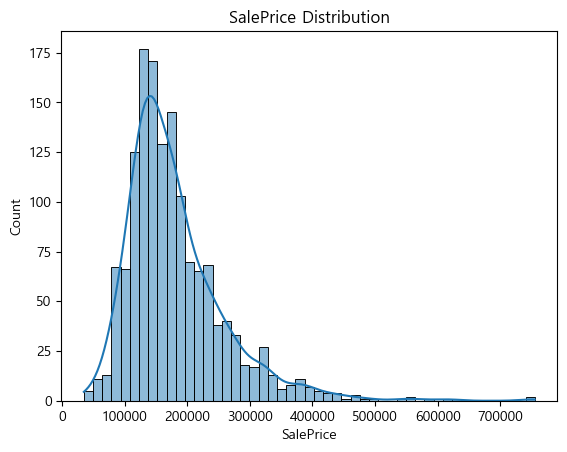

In [47]:
# 타겟 분포
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()



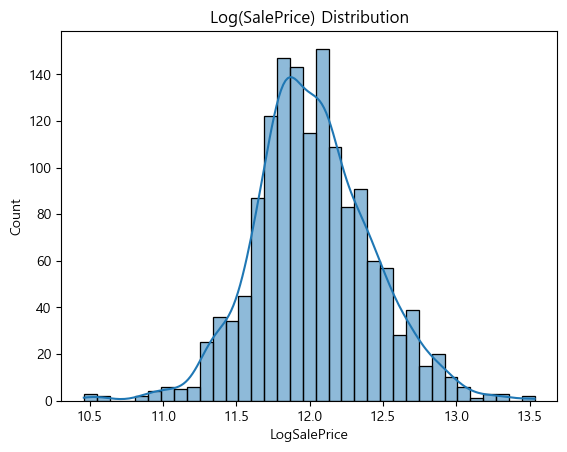

In [48]:
# ✔️ 정규성 판단용 시각화 (로그 변환)
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [49]:
len(train)

1460

In [50]:
# 결측치 확인 
nulls = train.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageCond        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [51]:
# 수치, 범주형 컬럼 분리
numerical_feats = train.select_dtypes(include=['int64', 'float64']).columns
categorical_feats = train.select_dtypes(include=['object']).columns

print("수치형 변수 개수:", len(numerical_feats))
print("범주형 변수 개수:", len(categorical_feats))

수치형 변수 개수: 39
범주형 변수 개수: 43


In [ ]:
# 수치형 컬럼 중에서 SalePrice와의 상관관계
corr_matrix = train[numerical_feats].corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

print("SalePrice와 상관 높은 변수:")
print(top_corr)

SalePrice와 상관 높은 변수:
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


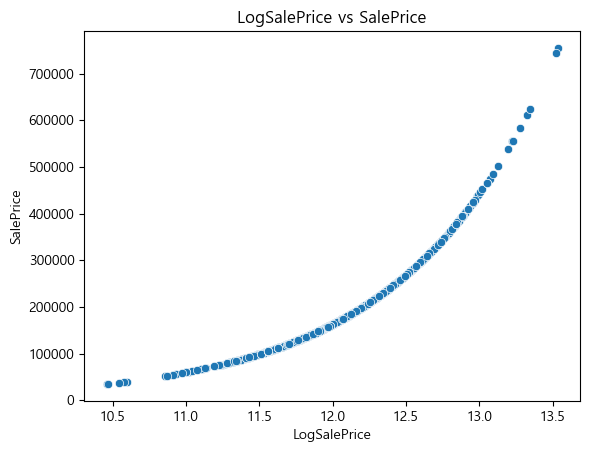

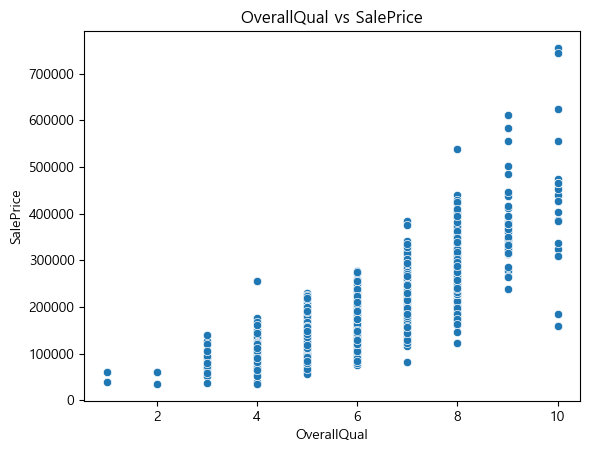

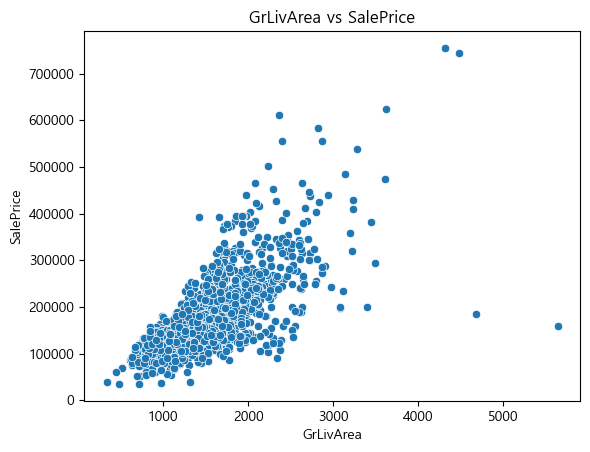

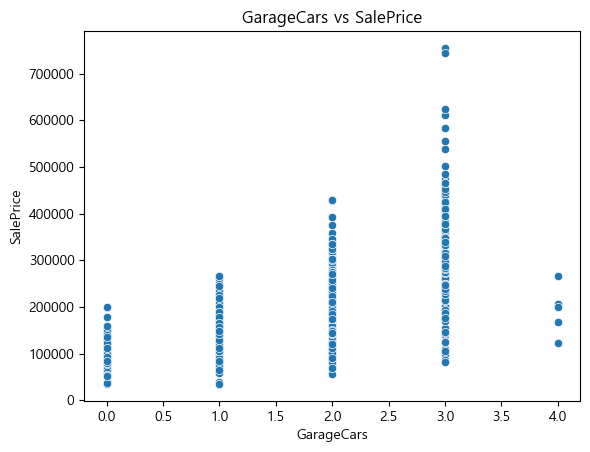

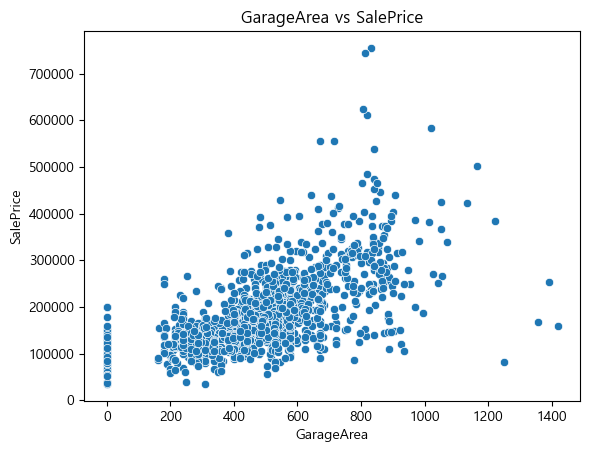

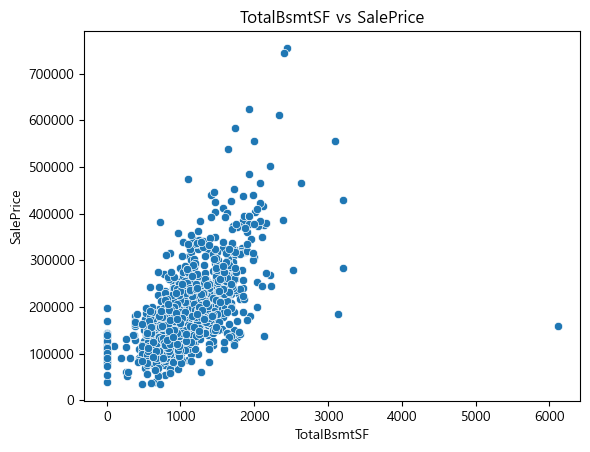

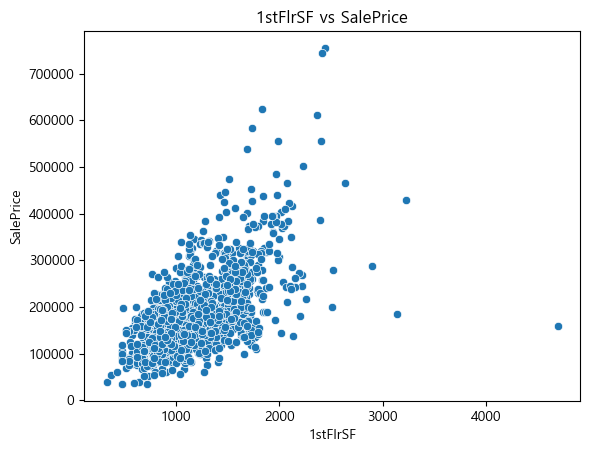

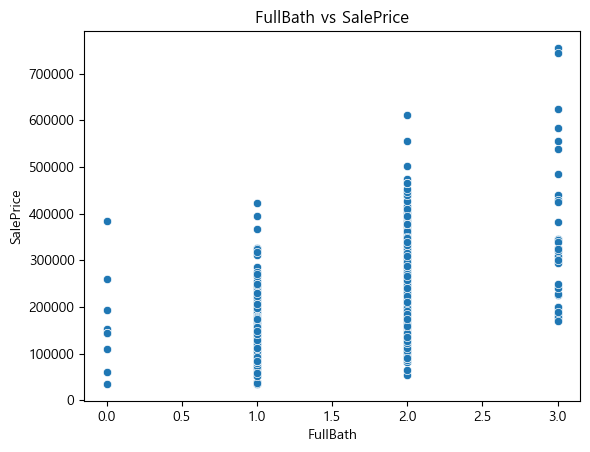

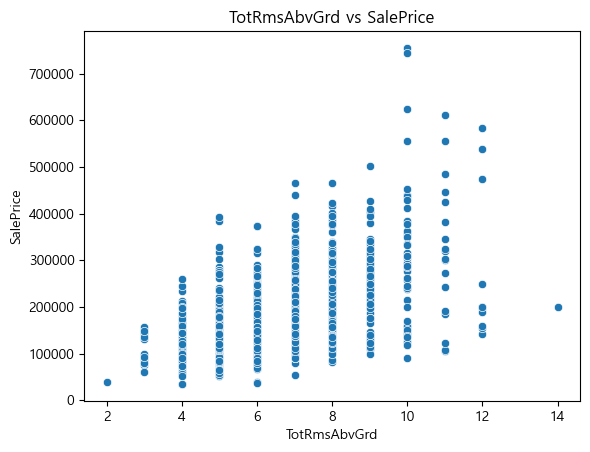

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = top_corr.index.drop("SalePrice")  # 자기 자신은 제외

for col in top_features:
    sns.scatterplot(data=train, x=col, y='SalePrice')
    plt.title(f"{col} vs SalePrice")
    plt.show()

## 🔚 결론: 피처 해석 정리

| Feature       | 유의미함       | 이상치 있음?     | 변환 추천                       |
|---------------|----------------|------------------|---------------------------------|
| OverallQual   | ✅ 매우 중요    | ❌               | ❌ (그대로 사용)                |
| GrLivArea     | ✅              | ✅               | ✅ 로그변환                     |
| GarageCars    | ✅              | ❗ 일부           | ❌                              |
| GarageArea    | ✅              | ✅               | ❌                              |
| TotalBsmtSF   | ✅              | ❗ 0 있음         | ✅ 로그변환 or 파생 변수       |
| 1stFlrSF      | ✅              | ✅               | ❌                              |
| FullBath      | ✅              | ❗ 분산 큼        | ❌                              |
| TotRmsAbvGrd  | ⭕ 약함         | ❗ 무의미한 증가   | ❌                              |

In [54]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,11.870607
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,12.634606
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,12.206078
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,11.774528
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,11.678448


In [55]:
# 수치형 피처 중 상관 높은 컬럼 추출 (SalePrice, LogSalePrice 제외)
top_corr_feats = corr_matrix['SalePrice'].drop(['SalePrice', 'LogSalePrice']).sort_values(ascending=False).head(10)
print(top_corr_feats)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [56]:
selected_numerical = top_corr_feats.index.tolist()
print(selected_numerical)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [57]:
# 마이너스 깨짐 방지 
import os
import matplotlib.pyplot as plt
# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'


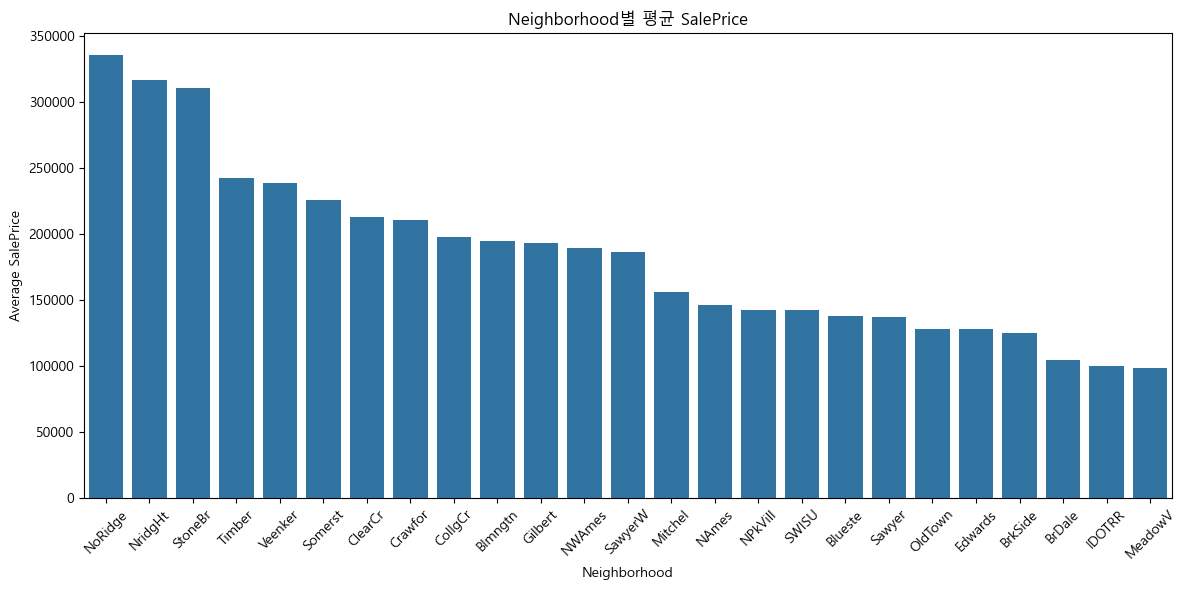

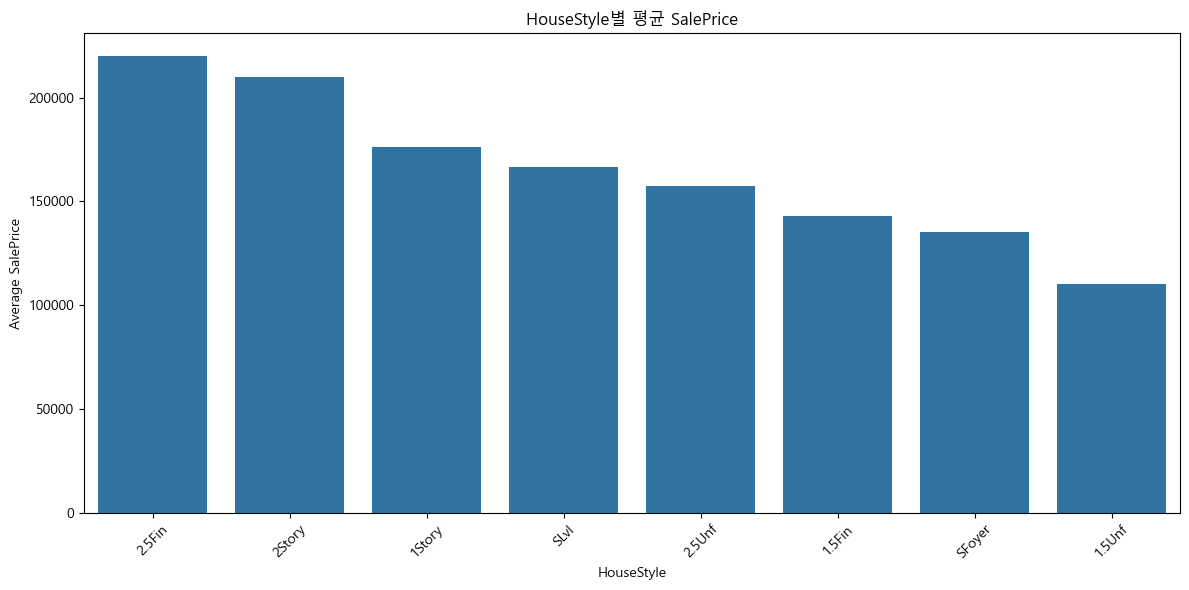

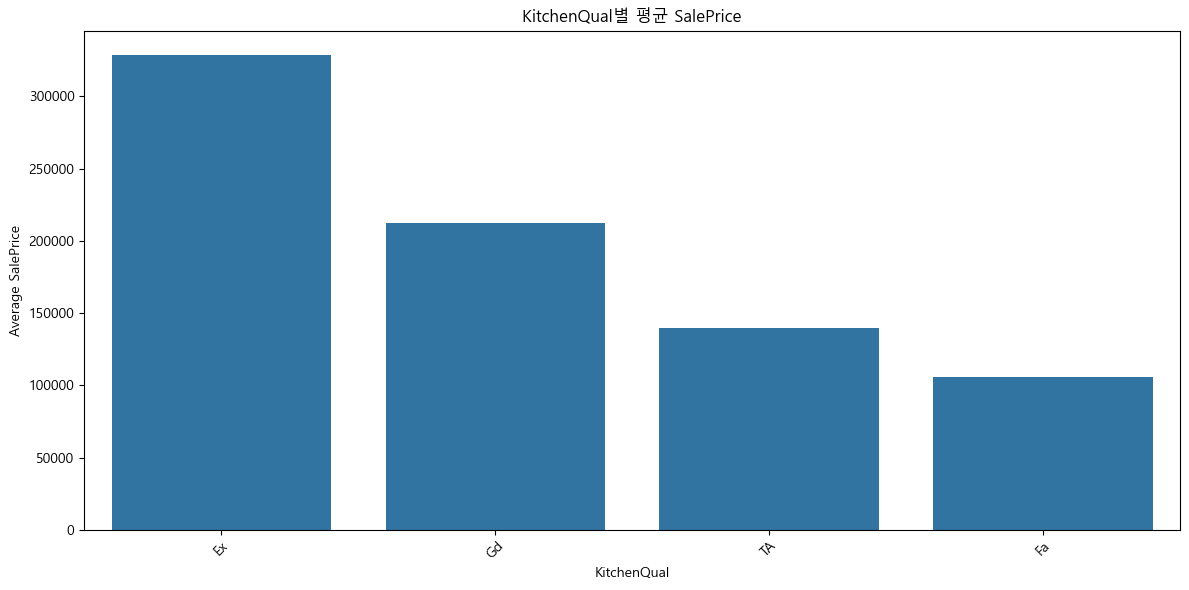

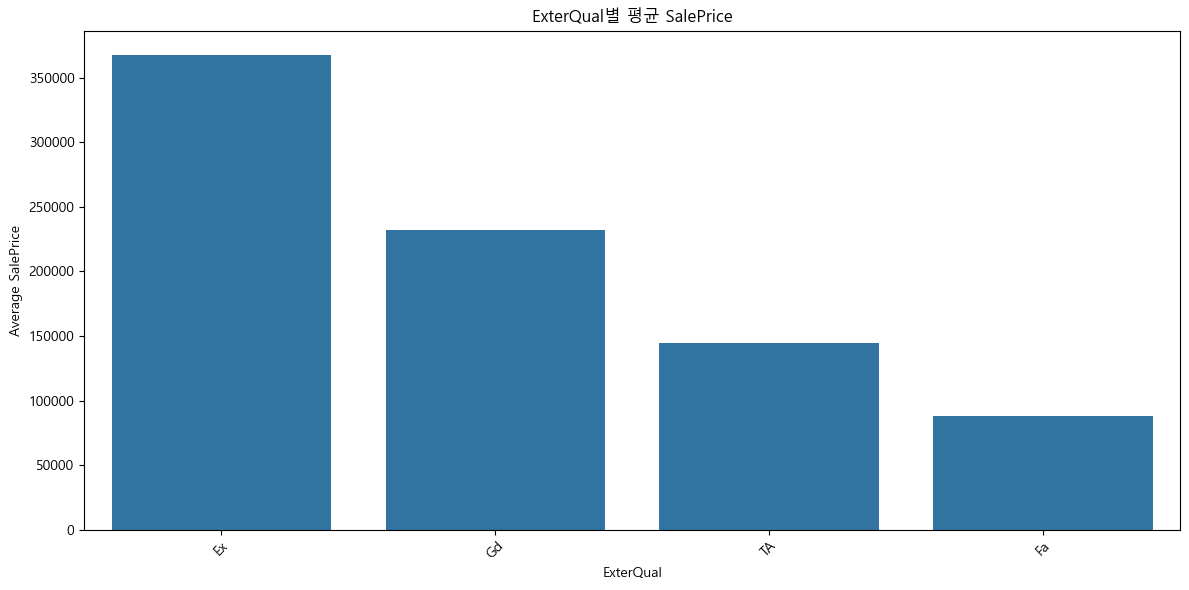

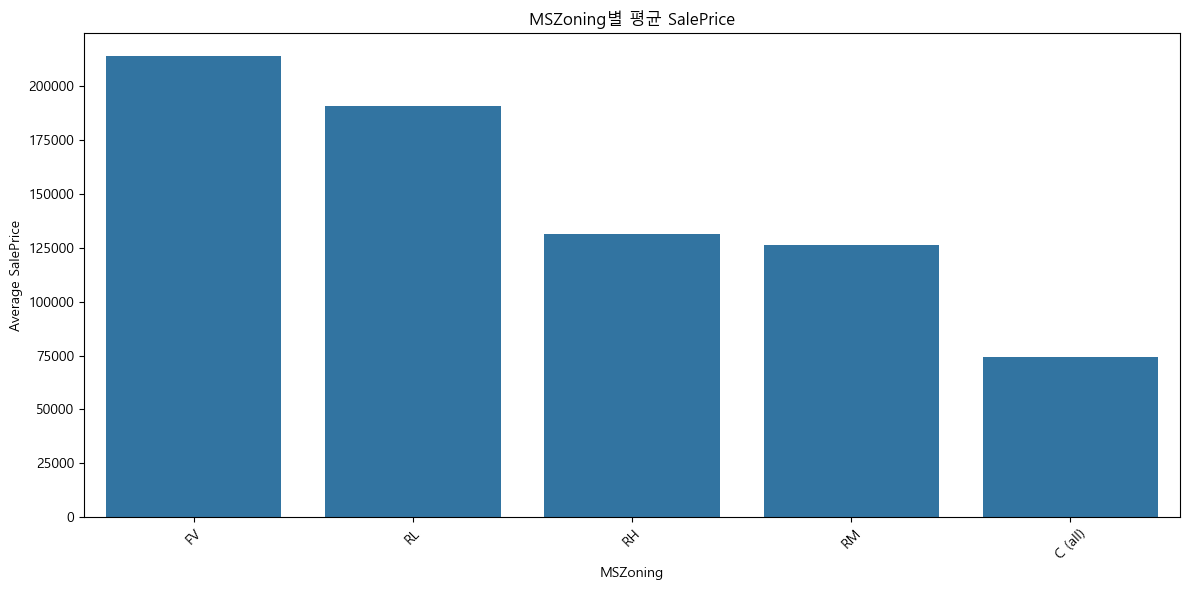

In [58]:
selected_categorical = ['Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning']

for col in selected_categorical:
    # 범주별 평균 SalePrice 계산
    mean_prices = train.groupby(col)['SalePrice'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_prices.index, y=mean_prices.values)
    plt.xticks(rotation=45)
    plt.title(f"{col}별 평균 SalePrice")
    plt.ylabel("Average SalePrice")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [59]:
# 🔍 해석 방법 및 인사이트 예시
# 1. Neighborhood (지역)
# NoRidge, NridgHt, StoneBr 등의 지역은 평균 집값이 높고,

# MeadowV, IDOTRR 등은 평균 집값이 낮아.

# 👉 이건 모델에 적용 시 지역별 더미 변수(One-hot encoding) 생성하거나 고가/중가/저가 지역으로 묶어 파생 변수로 만들어도 좋아.

# 2. HouseStyle (주택 유형)
# 2.5Fin과 2Story 주택의 평균 가격이 높고, 1.5Unf, SFoyer는 낮은 편.

# 👉 주택 구조 역시 가격과 관련성이 있으므로 중요한 피처로 간주할 수 있어.

# 3. KitchenQual (주방 품질)
# Ex > Gd > TA > Fa 순으로 가격이 뚜렷하게 달라져.

# 👉 이건 명확한 순서형 변수이므로, Label Encoding 처리를 할 수 있고, 모델이 잘 활용할 수 있는 피처야.

# 4. ExterQual (외부 자재 품질)
# KitchenQual과 비슷하게 품질 등급에 따라 집값이 차이 나.

# 👉 순서형 인코딩 + 파생변수로도 활용 가능.

# 5. MSZoning (용도 구분)
# FV, RL 같은 용도일수록 높은 가격대가 형성되어 있고, C (all)은 평균적으로 낮은 편이야.

# 👉 지역 zoning도 중요한 변수임을 시각적으로 확인할 수 있어.

In [60]:
# 수치 + 범주형 데이터 컬럼 합치기 
selected_features = selected_numerical + selected_categorical

In [61]:
X_train = train[selected_features].copy()
X_test = test[selected_features].copy()
y_train = train['SalePrice']

In [62]:
# 범주형 → 'None', 수치형 → 평균
# 범주형 결측치 처리 (X_train 기준 최빈값으로)
for col in selected_categorical:
    most_common = X_train[col].mode()[0]  # 최빈값
    X_train[col] = X_train[col].fillna(most_common)
    X_test[col] = X_test[col].fillna(most_common)

for col in selected_numerical:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())

In [66]:
print(X_train.columns)
print(X_test.columns)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning'],
      dtype='object')
Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning'],
      dtype='object')


In [67]:
# 범주형 피처 인코딩 (drop_first=True로 다중공선성 방지)
X_train_encoded = pd.get_dummies(X_train, columns=selected_categorical, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=selected_categorical, drop_first=True)

# 혹시 테스트셋에 없는 컬럼이 생겼을 수 있으니 → 컬럼 맞춰주기
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 모델 선언 및 학습
model = LinearRegression()
model.fit(X_train_encoded, np.log1p(y_train))  # 로그 변환한 y로 학습

LinearRegression()

In [75]:
# 2. 예측
y_pred = model.predict(X_train_encoded)

In [76]:
# 3. 성능 평가 (RMSE)
rmse = np.sqrt(mean_squared_error(np.log1p(y_train), y_pred))
print(f"Train RMSE (log scale): {rmse:.4f}")

Train RMSE (log scale): 0.1469


In [78]:
model.coef_  # → 각 피처에 대한 회귀 계수 (영향력)

array([ 7.41390109e-02,  2.38341374e-04,  5.99384507e-02,  6.84636791e-05,
        9.92441384e-05, -5.14847543e-05, -6.75017831e-03,  7.58006659e-03,
        1.22565768e-03,  1.97989399e-03,  3.75563400e-02, -7.46541539e-02,
        8.31647964e-02,  2.23051624e-01,  8.39854656e-02,  2.47693241e-01,
       -2.31789361e-02,  8.16605042e-02,  3.48945986e-02, -6.39741635e-02,
        5.10050424e-02,  7.24436213e-02,  7.79038254e-03,  8.58106750e-02,
        2.00934653e-01,  1.67772932e-01,  3.04585954e-03,  5.72595205e-02,
        5.60022514e-02,  6.78664453e-02,  9.99447061e-02,  2.16453154e-01,
        1.47140754e-01,  2.49091505e-01, -3.64741415e-02,  8.75512606e-03,
       -3.19685757e-02,  1.31110662e-02, -3.90529340e-02,  3.38347792e-02,
        3.61795564e-02, -1.49873804e-01, -6.39659808e-02, -9.82469084e-02,
       -8.20203125e-02, -1.25677856e-02, -1.04762964e-03,  4.28974650e-01,
        3.66288126e-01,  4.34156360e-01,  3.57183693e-01])

In [79]:
for col, coef in zip(X_train_encoded.columns, model.coef_):
    print(f"{col}: {coef:.4f}")

OverallQual: 0.0741
GrLivArea: 0.0002
GarageCars: 0.0599
GarageArea: 0.0001
TotalBsmtSF: 0.0001
1stFlrSF: -0.0001
FullBath: -0.0068
TotRmsAbvGrd: 0.0076
YearBuilt: 0.0012
YearRemodAdd: 0.0020
Neighborhood_Blueste: 0.0376
Neighborhood_BrDale: -0.0747
Neighborhood_BrkSide: 0.0832
Neighborhood_ClearCr: 0.2231
Neighborhood_CollgCr: 0.0840
Neighborhood_Crawfor: 0.2477
Neighborhood_Edwards: -0.0232
Neighborhood_Gilbert: 0.0817
Neighborhood_IDOTRR: 0.0349
Neighborhood_MeadowV: -0.0640
Neighborhood_Mitchel: 0.0510
Neighborhood_NAmes: 0.0724
Neighborhood_NPkVill: 0.0078
Neighborhood_NWAmes: 0.0858
Neighborhood_NoRidge: 0.2009
Neighborhood_NridgHt: 0.1678
Neighborhood_OldTown: 0.0030
Neighborhood_SWISU: 0.0573
Neighborhood_Sawyer: 0.0560
Neighborhood_SawyerW: 0.0679
Neighborhood_Somerst: 0.0999
Neighborhood_StoneBr: 0.2165
Neighborhood_Timber: 0.1471
Neighborhood_Veenker: 0.2491
HouseStyle_1.5Unf: -0.0365
HouseStyle_1Story: 0.0088
HouseStyle_2.5Fin: -0.0320
HouseStyle_2.5Unf: 0.0131
HouseStyle_2

In [77]:
# 실제 예측 (테스트셋)
test_pred = model.predict(X_test_encoded)
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": np.expm1(test_pred)  # 로그 역변환
})
submission.to_csv("submission_lr1.csv", index=False)
